In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import re
from sklearn.svm import SVC

In [2]:
# Load dataset
data = pd.read_csv('/content/classified_comments_no_issues.csv.zip')  # Replace with your dataset path

# Display first few rows
print(data.head())

                                                text  label
0                 beano  are the references notable       0
1  I’ve asked around and other Muslims haven’t ev...      1
2    w hate ver hypocrit perhaps you should actua...      0
3  He:I knew that even if I reached my dream, it ...      1
4  boring you have no sense in humor lemonparty o...      0


In [3]:
# Basic text cleaning function
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = text.lower()  # Convert to lowercase
    return text

# Apply preprocessing
data['text'] = data['text'].apply(preprocess_text)

# Display first few rows of the cleaned text
print(data.head())

                                                text  label
0                 beano  are the references notable       0
1  ive asked around and other muslims havent even...      1
2    w hate ver hypocrit perhaps you should actua...      0
3  hei knew that even if i reached my dream it co...      1
4  boring you have no sense in humor lemonparty o...      0


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['text'])
y = data['label'].values

In [5]:
data_sampled = data.sample(frac=0.1, random_state=42)  # Use 10% of the data for example
X_sampled = vectorizer.fit_transform(data_sampled['text'])
y_sampled = data_sampled['label'].values


In [6]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.utils import shuffle

classifier = MultinomialNB()
batch_size = 1000
num_batches = int(len(data) / batch_size)

for i in range(num_batches):
    start = i * batch_size
    end = (i + 1) * batch_size
    X_batch = vectorizer.transform(data['text'][start:end])
    y_batch = data['label'][start:end]
    classifier.partial_fit(X_batch, y_batch, classes=[0, 1])


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [8]:
X_test = X[-batch_size:]
y_test = y[-batch_size:]

In [9]:
#Naive Bayes Classification
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()
classifier.fit(X_train, y_train)



MultinomialNB()

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = classifier.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Accuracy: 95.56%
Confusion Matrix:
[[20086   326]
 [  933  7036]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     20412
           1       0.96      0.88      0.92      7969

    accuracy                           0.96     28381
   macro avg       0.96      0.93      0.94     28381
weighted avg       0.96      0.96      0.96     28381

Precision: 0.9557185547405597
Recall: 0.8829213201154473
F1 Score: 0.9178788076446416


In [12]:
#SVM Classification
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
from sklearn.svm import LinearSVC

svm_classifier = LinearSVC()
svm_classifier.fit(X_train, y_train)

LinearSVC()

In [14]:
y_pred = svm_classifier.predict(X_test)


In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 96.83%
Precision: 0.961850013065064
Recall: 0.9238298406324508
F1 Score: 0.9424566344492096
Confusion Matrix:
[[20120   292]
 [  607  7362]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     20412
           1       0.96      0.92      0.94      7969

    accuracy                           0.97     28381
   macro avg       0.97      0.95      0.96     28381
weighted avg       0.97      0.97      0.97     28381



In [16]:
#Logistic regression

In [17]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Data visualization
# Word clouds
from wordcloud import WordCloud

In [19]:
toxic_comments = data[data['label'] == 1]['text']
non_toxic_comments = data[data['label'] == 0]['text']

In [20]:
wordcloud_toxic = WordCloud(width=800, height=400, background_color='black').generate(' '.join(toxic_comments))
wordcloud_non_toxic = WordCloud(width=800, height=400, background_color='white').generate(' '.join(non_toxic_comments))

(-0.5, 799.5, 399.5, -0.5)

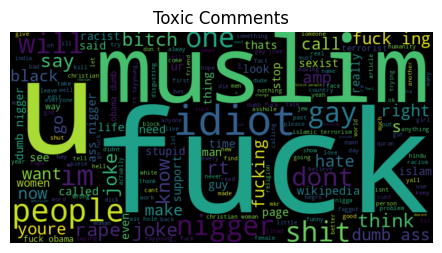

In [21]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_toxic, interpolation='bilinear')
plt.title('Toxic Comments')
plt.axis('off')

(-0.5, 799.5, 399.5, -0.5)

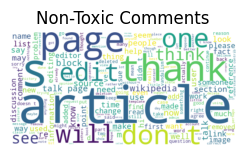

In [22]:
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_non_toxic, interpolation='bilinear')
plt.title('Non-Toxic Comments')
plt.axis('off')

In [23]:
plt.show()

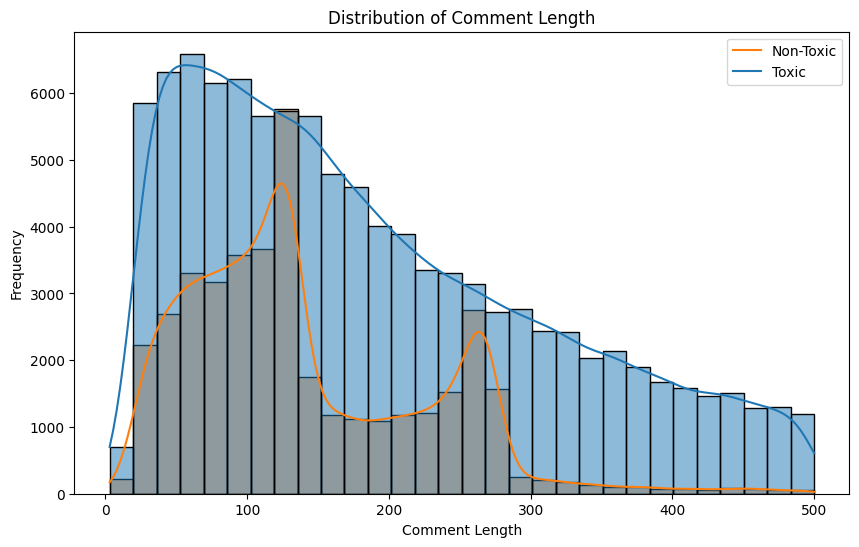

In [24]:
# Histograms
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x=data['text'].apply(len), hue='label', bins=30, kde=True)
plt.title('Distribution of Comment Length')
plt.xlabel('Comment Length')
plt.ylabel('Frequency')
plt.legend(['Non-Toxic', 'Toxic'])
plt.show()

In [25]:
# Model training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [27]:
# Model evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 96.49%

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     20412
           1       0.97      0.90      0.94      7969

    accuracy                           0.96     28381
   macro avg       0.97      0.95      0.96     28381
weighted avg       0.97      0.96      0.96     28381


Confusion Matrix:
[[20191   221]
 [  774  7195]]
